In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = "/Library/fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

AppleGothic


# Numpy를 이용한 선형 회귀분석

In [2]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)


In [3]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [6]:
y

array([186.25546612,  70.28369976,  48.54383774,  81.88910288,
        70.36216661,  45.57917665,   6.94598586, 208.76917953,
       -47.77636788,  52.93562464, 109.02887309, 126.04856359,
       290.95126314, 118.00356014, 299.38088463, 228.35479769,
        80.80918335,  14.19379624, 149.70916278,  69.68590087,
       194.26822887,  87.22691265, 147.90300408, 194.88189428,
       141.44172936,  65.05212071, 137.7801633 ,  53.50211822,
       112.59429492, 122.79958197,  67.93928068,  98.55010164,
       143.44601128, 115.39323168,  76.54386333, 116.43707868,
        72.928342  , 208.66580219, 103.0263528 ,  91.11602315,
       126.07673063, 232.05303395,  27.03173937,  -2.67695316,
        39.26676076, 186.28880406, -17.04495891, 125.36522347,
       100.18881139, 182.08142411, 269.8438322 , 234.53742597,
       148.92166864, 215.05804417,  95.26432564, 124.84572407,
       127.71455299,  42.854506  ,  27.39755369, 153.16288893,
        74.28319319,  74.93652909, 141.37001951, 141.08

In [10]:
# 상수항 결합
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [8]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [11]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(
    n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)


In [14]:
coef

array(80.71051956)

In [15]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[102.02701439],
       [ 81.59750943]])

In [16]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[102.02701439],
       [ 81.59750943]])

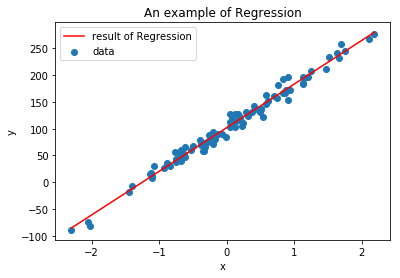

In [20]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new) # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="result of Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("An example of Regression")
plt.legend()
plt.show()

# scikit-learn 패기지를 사용한 선형 회귀분석

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [49]:
model = model.fit(X, y)

In [33]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [34]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [35]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [36]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [37]:
model_boston.intercept_

36.45948838508965

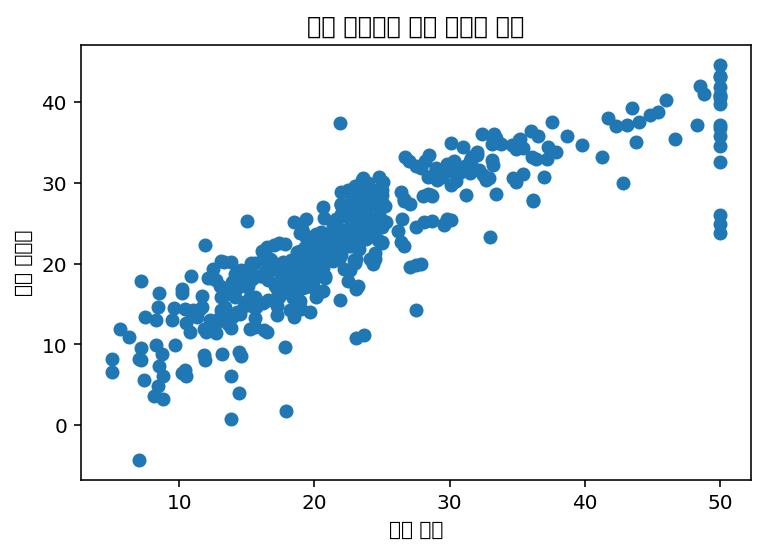

In [47]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측지")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show()

In [ ]:
## 연습문제 1번

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [51]:
model = model.fit(X, y)

In [57]:
answer = LinearRegression().fit(X, y)

In [53]:
answer

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
bias = 100
X0_one, y_one, w_one = make_regression(
    n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X_one = sm.add_constant(X0_one)
y_one = y_one.reshape(len(y_one), 1)
model_one = LinearRegression().fit(X_one, y_one)

In [60]:
model_one

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
bias = 100
X0_two, y_two, w_two = make_regression(
    n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=2)
X_two = sm.add_constant(X0_two)
y_two = y_two.reshape(len(y_two), 1)
model_two = LinearRegression().fit(X_two, y_two)


In [64]:
# 회귀분석
prediction_one = model_one.predict(X_one)
prediction_two = model_two.predict(X_two)


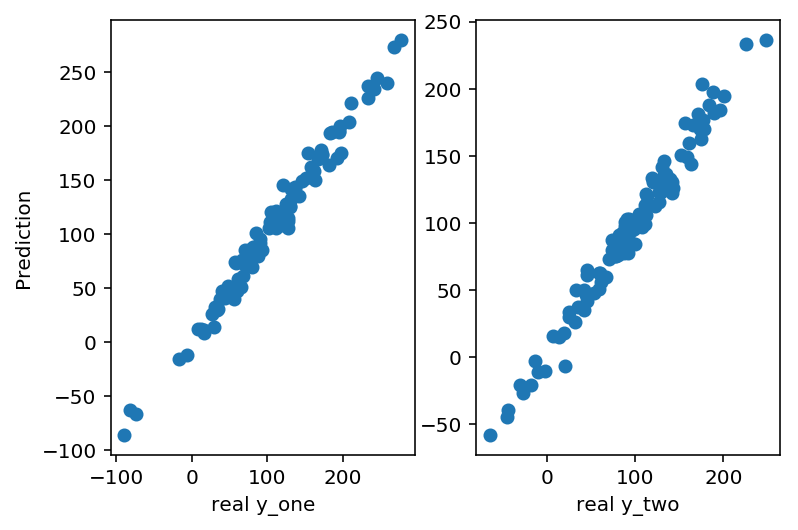

In [65]:
# 그래프
plt.subplot(121)
plt.scatter(y_one, prediction_one)
plt.xlabel("real y_one")
plt.ylabel("Prediction")
            
plt.subplot(122)
plt.scatter(y_two, prediction_two)
plt.xlabel("real y_two")
plt.show()

In [27]:
dfX0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(diabetes.target, columns=["MEDV"])

model_diabetes2 = sm.OLS(dfy, dfX)
result_diabetes2 = model_diabetes2.fit()
print(result_boston2.summary())

NameError: name 'diabetes' is not defined

In [16]:
df = load_diabetes()
pd.DataFrame(df)

ValueError: arrays must all be same length

In [33]:
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
from sklearn import datasets

In [28]:
diabetes = load_diabetes
dfX0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(diabetes.target, columns=["dddd"])
model = sm.OLS(y, X)



AttributeError: 'function' object has no attribute 'data'

In [24]:
model = sm.OLS(y, X)

NameError: name 'y' is not defined

In [25]:
dfX0 = pd.DataFrame(boston.data, columns=.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

NameError: name 'boston' is not defined

In [26]:
from sklearn.datasets import boston

ImportError: cannot import name 'boston' from 'sklearn.datasets' (/usr/local/lib/python3.7/site-packages/sklearn/datasets/__init__.py)

In [36]:
diabetes = datasets.load_diabetes()
dfX0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(dia.target, columns=["y_full"])

model_d = sm.OLS(dfy, dfX)
result_d = model_d.fit()
print(result_d.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_full   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 03 Nov 2018   Prob (F-statistic):           3.83e-62
Time:                        10:50:11   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


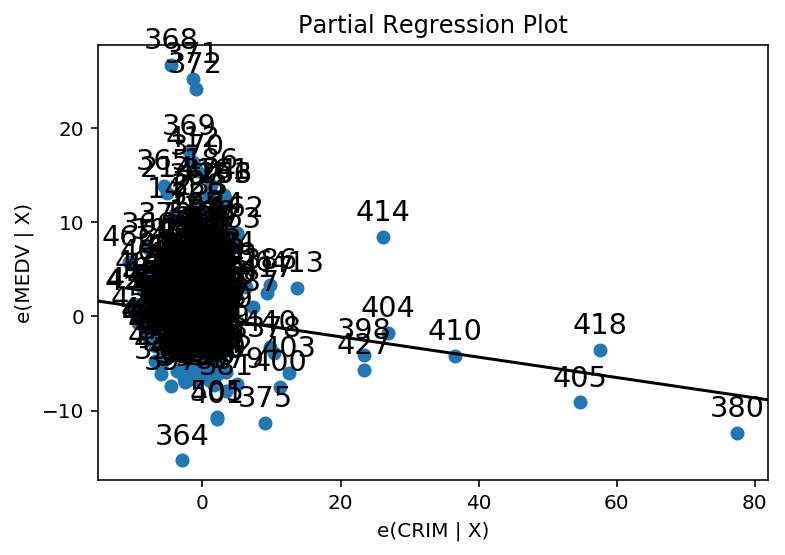

In [38]:
others = list(set(df.columns).difference(set(["MEDV", "CRIM"])))
p, resids = sm.graphics.plot_partregress("MEDV", "CRIM", others, data=df, ret_coords=True)
plt.show()

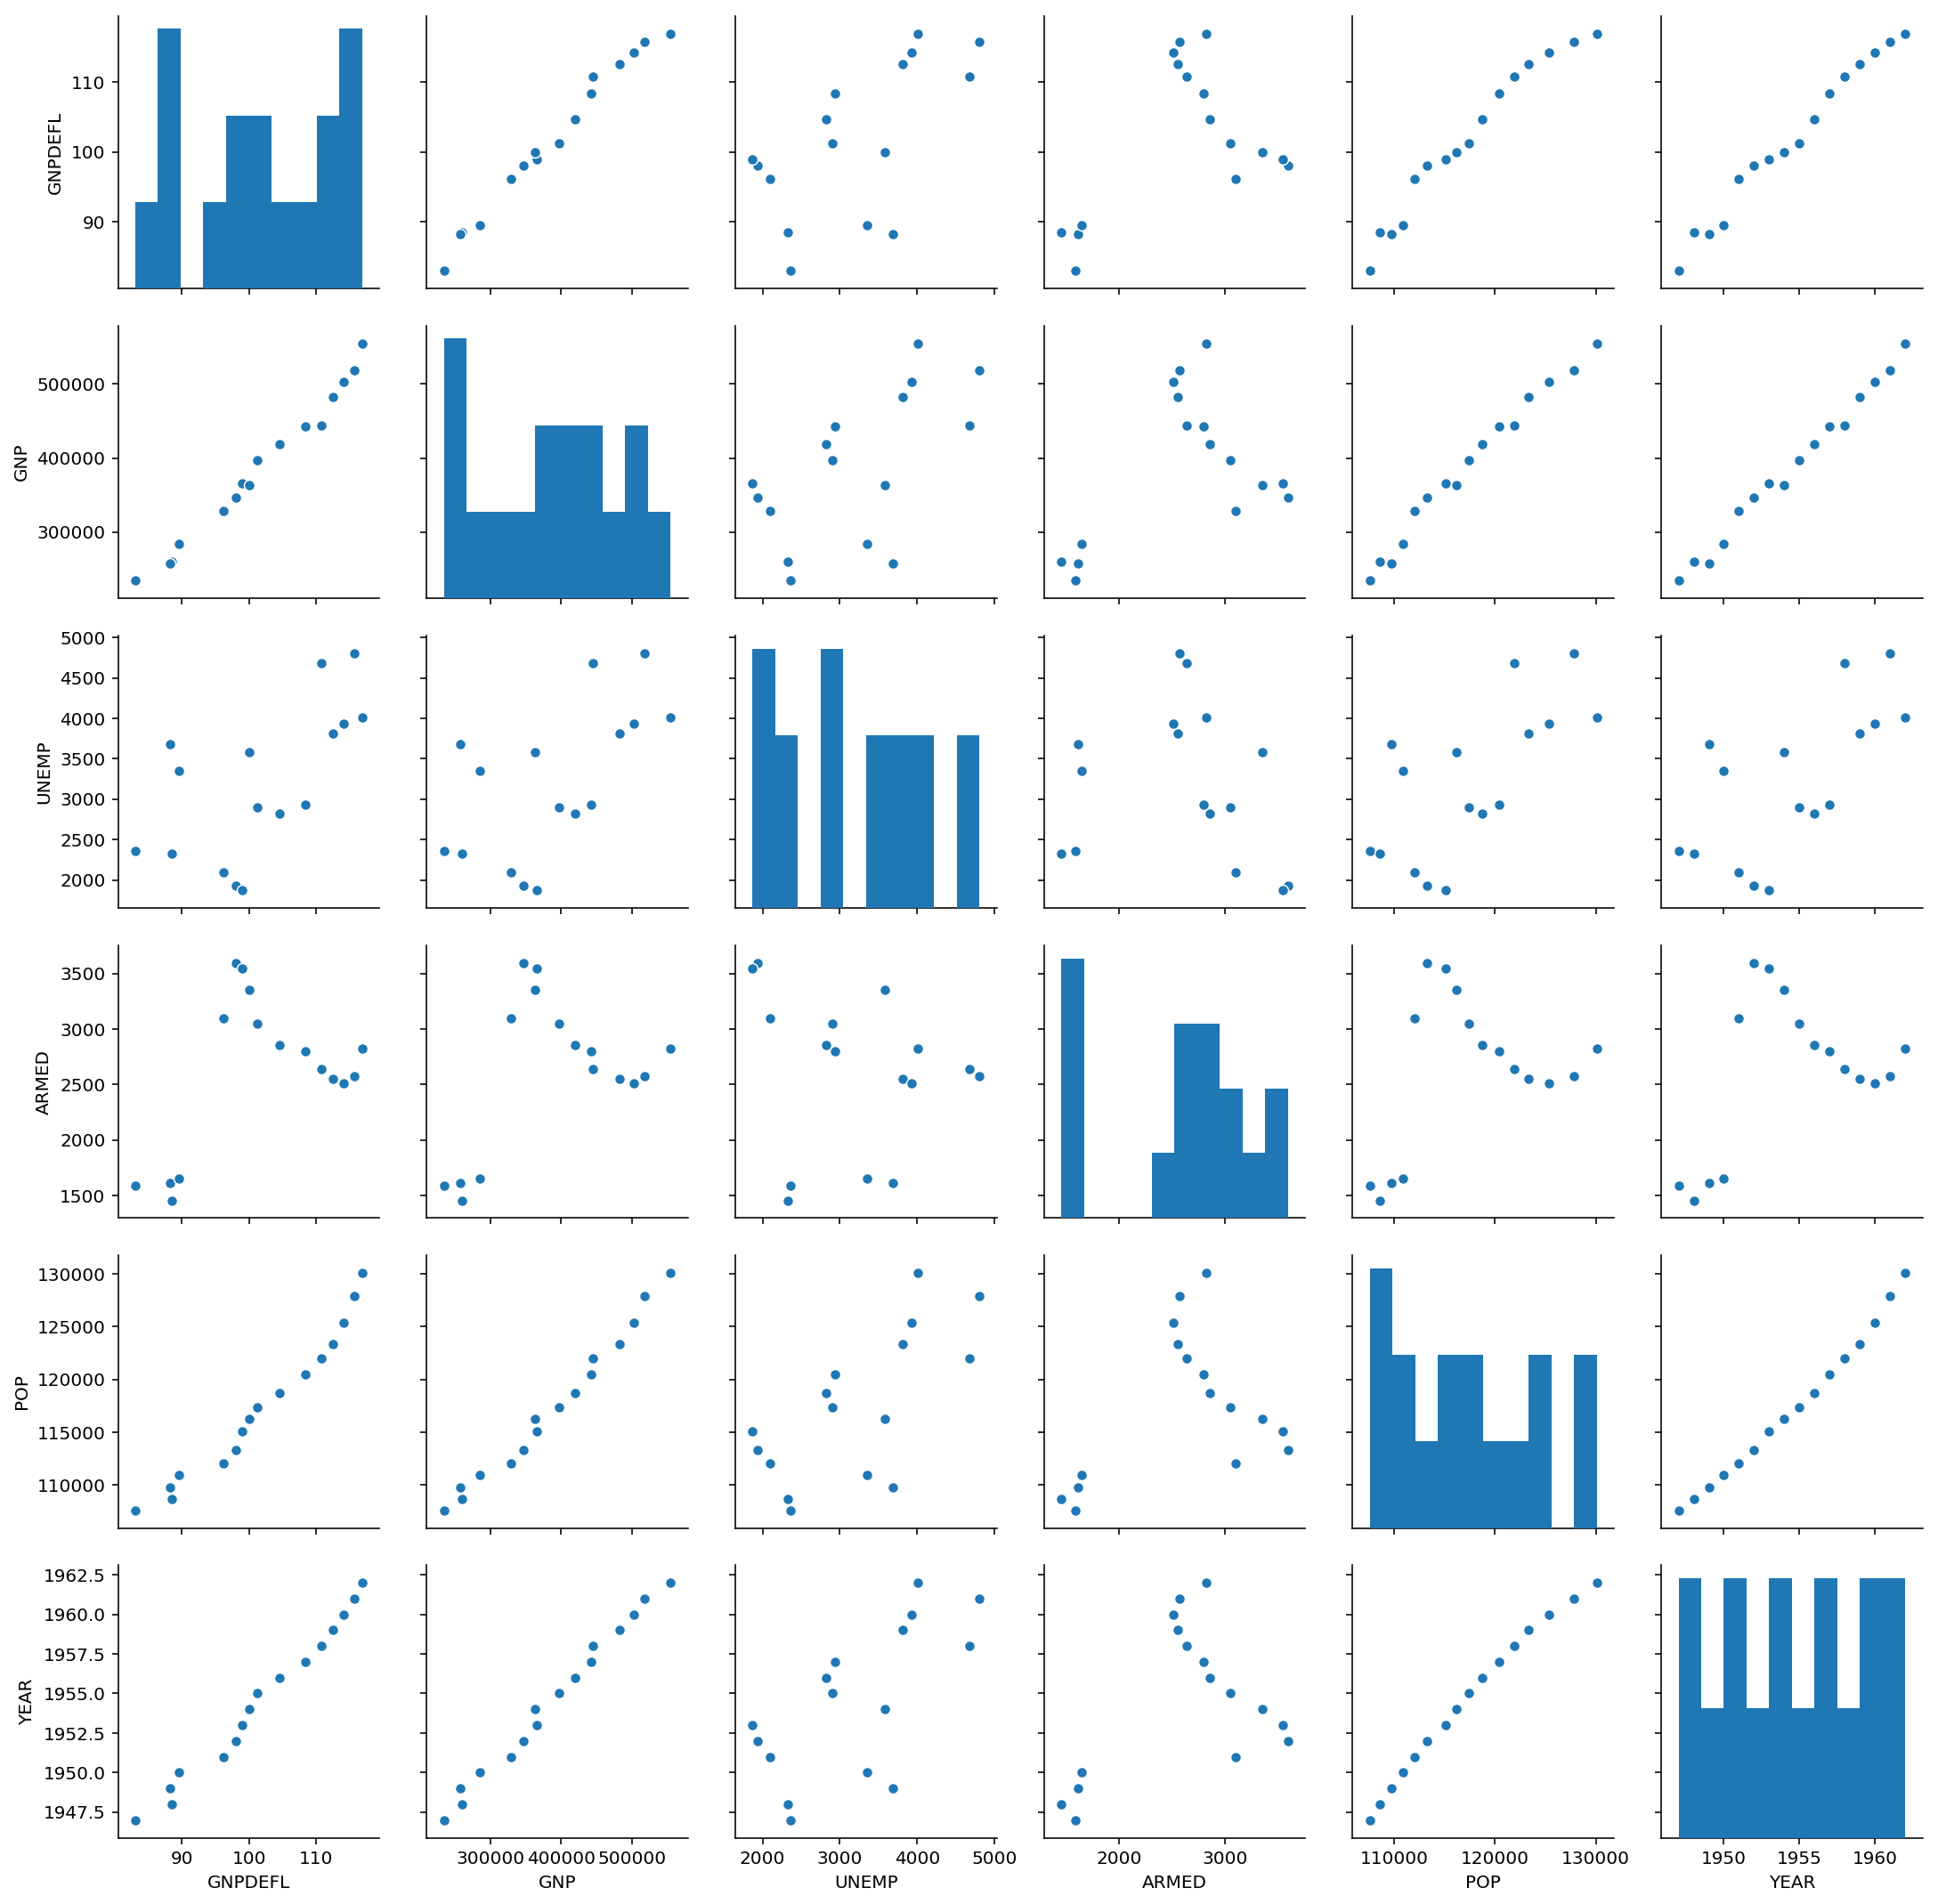

In [41]:
from statsmodels.datasets.longley import load_pandas
dfy = load_pandas().endog
dfX = load_pandas().exog
df = pd.concat([dfy, dfX], axis=1)
sns.pairplot(dfX)
plt.show()

In [40]:
plt.show()

In [44]:
pandas = load_pandas

In [45]:
from sklearn.datasets import load_pandas

dfX0 = pd.DataFrame(pandas.data, columns=pandas.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(pandas.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
model_pandas = sm.OLS(dfy, dfX)
result_pandas = model_pandas.fit()

ImportError: cannot import name 'load_pandas' from 'sklearn.datasets' (/usr/local/lib/python3.7/site-packages/sklearn/datasets/__init__.py)